In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [77]:
podcastAna = pd.read_csv('DataBases/chartablePodcast.csv', delimiter=',')
podcastAna.shape

(200, 4)

In [74]:
podcastDF = pd.read_csv('DataBases/clean_podcast_genres.csv', delimiter=',')

podcastDF['rank_date'] = pd.to_datetime(podcastDF['rank_date'])

podcastDF.shape


(416, 5)

In [85]:
podcastAna_all = podcastAna.merge(podcastDF, how='left', on='name', left_index= True, right_index= True, sort=False, copy=True, indicator=False, validate=None)
podcastAna_all= podcastAna_all.drop(columns = ['creator_y']).rename(columns = {'creator_x':'network'})
podcastAna_all.head()

,network,name,num_ratings,rating,rank,rank_date,genres
0,audiochuck,Crime Junkie,295124.0,4.8,175,2020-10-04,education
1,The Daily Wire,The Matt Walsh Show,9337.0,4.8,175,2020-10-04,spirituality
2,NaN,百靈果NEWS,1272.0,4.8,181,2020-09-27,education
3,Pushkin Industries,The Happiness Lab with Dr. Laurie Santos,15328.0,4.8,181,2020-09-27,spirituality
4,NaN,Get Sleepy,6258.0,4.6,169,2020-09-06,education


In [119]:
podcastAna_network = podcastAna_all.groupby('network', group_keys=False).agg('mean').reset_index().sort_values(by='rating', ascending = False)
podcastAna_network

,network,num_ratings,rating,rank
73,Team Coco & Nicole Byer,14144.0,4.9,73.0
77,The Roost x Sweet Boys,4921.0,4.9,156.0
37,Headgum / Doughboys Media,4252.0,4.9,21.0
33,Forever Dog,10864.0,4.9,145.0
35,Fréquence Moderne,4500.0,4.9,164.0
...,...,...,...,...
40,"Joe Scarborough and Mika Brzezinski, MSNBC",6995.0,4.0,15.0
94,iHeartRadio,2852.0,4.0,26.0
15,"Chuck Todd, Meet the Press",1977.0,4.0,31.0
16,"Chuck Todd, NBC News",3421.0,3.7,126.0


In [159]:
#For the podcasts that have more than one network listed
podcastAna_all_network = podcastAna_all.copy()
# Split the network column using ['/',',', '|']
podcastAna_all_network
podcastAna_all_network['network'] = podcastAna_all_network['network'].apply(lambda x: str(x).split('/'))


In [156]:
# i keeps tracks of index
index=0
# save [index, network] in a nested list
list_ = []
for item in podcastAna_all_network['network']:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
network = pd.DataFrame(list_, columns=['index', 'network'])

In [163]:
podcastAna_all_network = pd.merge(podcastAna_all_network.drop('network', axis=1), network, how='right', left_index=True, right_on='index')#.dropna(axis=0)
podcastAna_all_network = podcastAna_all_network.replace('nan', None).drop(columns = 'index').sort_values(by='rating', ascending = False)
podcastAna_all_network.head(10)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,name,num_ratings,rating,rank,rank_date,genres,network
60,Face Jam,3196.0,5.0,115,2021-02-07,business,Rooster Teeth
125,SuperMegaCast,11817.0,5.0,126,2020-06-28,arts,The Verge
117,Greenelines,NaN,5.0,134,2020-10-04,food,Charisma Podcast Network
172,The Bald and the Beautiful with Trixie Mattel ...,9335.0,5.0,92,2020-06-28,crime,Studio71
28,投資癮,NaN,5.0,31,2021-02-07,business,TWiT
171,Literally! With Rob Lowe,NaN,4.9,92,2020-06-28,culture,"Stitcher & Team Coco, Rob Lowe"
163,Race Chaser with Alaska & Willam,10864.0,4.9,145,2020-09-27,crime,Forever Dog
169,REAL AF with Andy Frisella,29992.0,4.9,104,2020-07-12,crime,Kast Media
97,El Dollop,NaN,4.9,28,2020-09-27,travel,Sonoro | All Things Comedy
31,2 Heures De Perdues,4500.0,4.9,164,2020-06-28,comedy,Fréquence Moderne


In [166]:
#For the podcasts that have more than one network listed
podcastAna_all_network2 = podcastAna_all_network.copy()
# Split the network column using ['/',',', '|']

podcastAna_all_network2['network'] = podcastAna_all_network2['network'].apply(lambda x: str(x).split('/'))


In [167]:
# i keeps tracks of index
index=0
# save [index, network] in a nested list
list_ = []
for item in podcastAna_all_network2['network']:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
network2 = pd.DataFrame(list_, columns=['index', 'network'])

In [168]:
podcastAna_all_network2 = pd.merge(podcastAna_all_network2.drop('network', axis=1), network2, how='right', left_index=True, right_on='index')#.dropna(axis=0)
podcastAna_all_network2 = podcastAna_all_network2.replace('nan', None).drop(columns = 'index').sort_values(by='rating', ascending = False)
podcastAna_all_network2.head(10)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,name,num_ratings,rating,rank,rank_date,genres,network
187,The Bald and the Beautiful with Trixie Mattel ...,9335.0,5.0,92,2020-06-28,crime,Vox
65,Face Jam,3196.0,5.0,115,2021-02-07,business,B9
135,SuperMegaCast,11817.0,5.0,126,2020-06-28,arts,"Chris Hayes, MSNBC"
127,Greenelines,NaN,5.0,134,2020-10-04,food,"Chris Hayes, MSNBC & NBCNews THINK"
28,投資癮,NaN,5.0,31,2021-02-07,business,Pushkin Industries
70,Black Box Down,4142.0,4.9,115,2020-11-08,careers,"B9, Regina Giannetti"
68,Inside of You with Michael Rosenbaum,10530.0,4.9,115,2021-02-07,education,Theo Von and Brendan Schaub
32,2 Heures De Perdues,4500.0,4.9,164,2020-06-28,comedy,The Ricochet Audio Network
35,Mark Groves Podcast,5633.0,4.9,186,2020-11-08,business,Headgum
36,Mark Groves Podcast,5633.0,4.9,186,2020-11-08,business,Doughboys Media


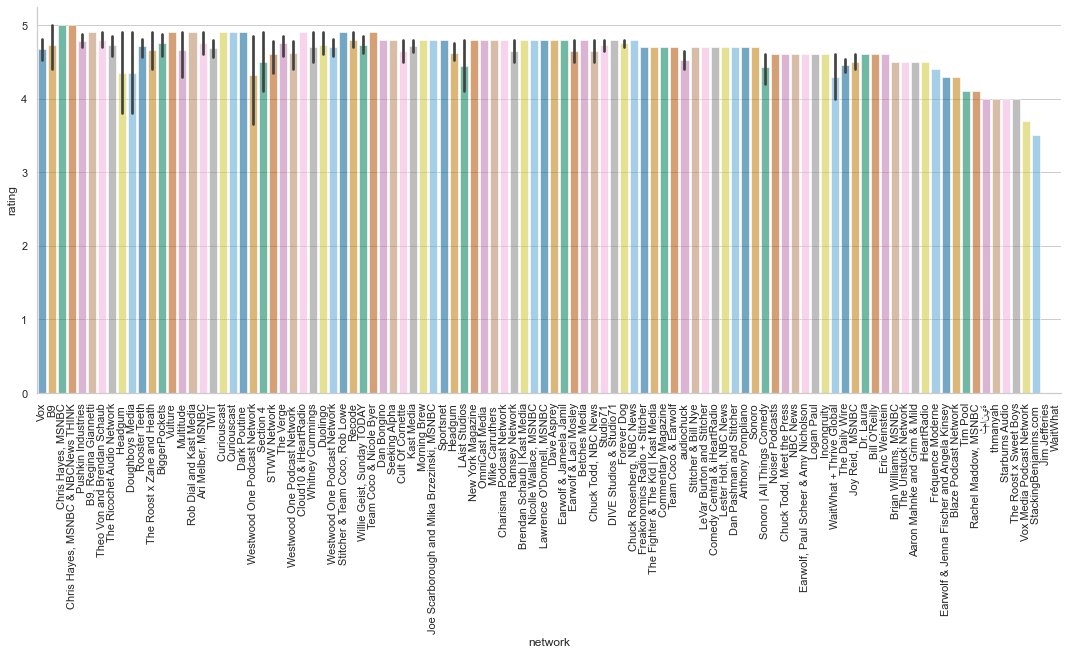

In [171]:
sns.set_theme(style="whitegrid")


sns.catplot(
    data=podcastAna_all_network2, kind="bar",
    x="network", y="rating", palette="colorblind", alpha=.6, height=6, aspect=22/8.27).set_xticklabels(rotation=90).set_axis_labels("network", "rating")


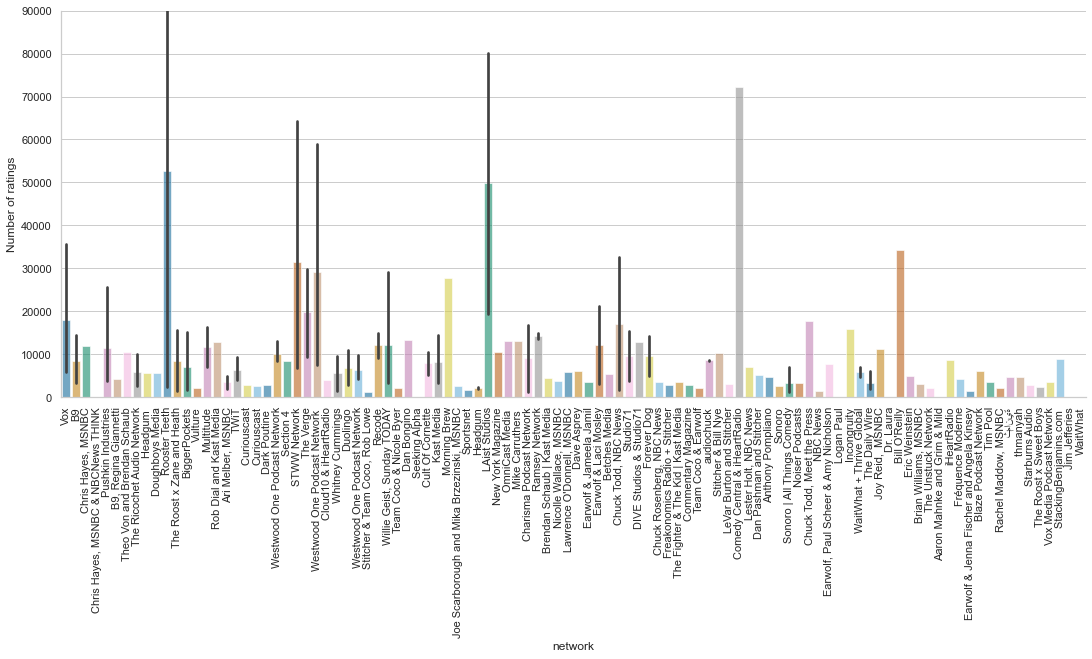

In [172]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=podcastAna_all_network2, kind="bar",
    x="network", y="num_ratings", palette="colorblind", alpha=.6, height=6, aspect=22/8.27).set_xticklabels(rotation=90).set_axis_labels("network", "Number of ratings")
g.set(ylim=(0, 90000))


In [173]:
podcastAna_network3 = podcastAna_all_network2.groupby('network', group_keys=False).agg('count').reset_index().sort_values(by='name', ascending = False)
podcastAna_network3.head(30)

,network,name,num_ratings,rating,rank,rank_date,genres
78,TWiT,11,8,11,11,11,11
90,Vox,9,8,9,9,9,9
95,Westwood One Podcast Network,9,7,9,9,9,9
62,Pushkin Industries,8,7,8,8,8,8
67,Rooster Teeth,8,6,8,8,8,8
96,Westwood One Podcast Network,8,8,8,8,8,8
4,STWW Network,7,7,7,7,7,7
49,Kast Media,5,5,5,5,5,5
81,The Daily Wire,5,4,5,5,5,5
13,BiggerPockets,4,4,4,4,4,4


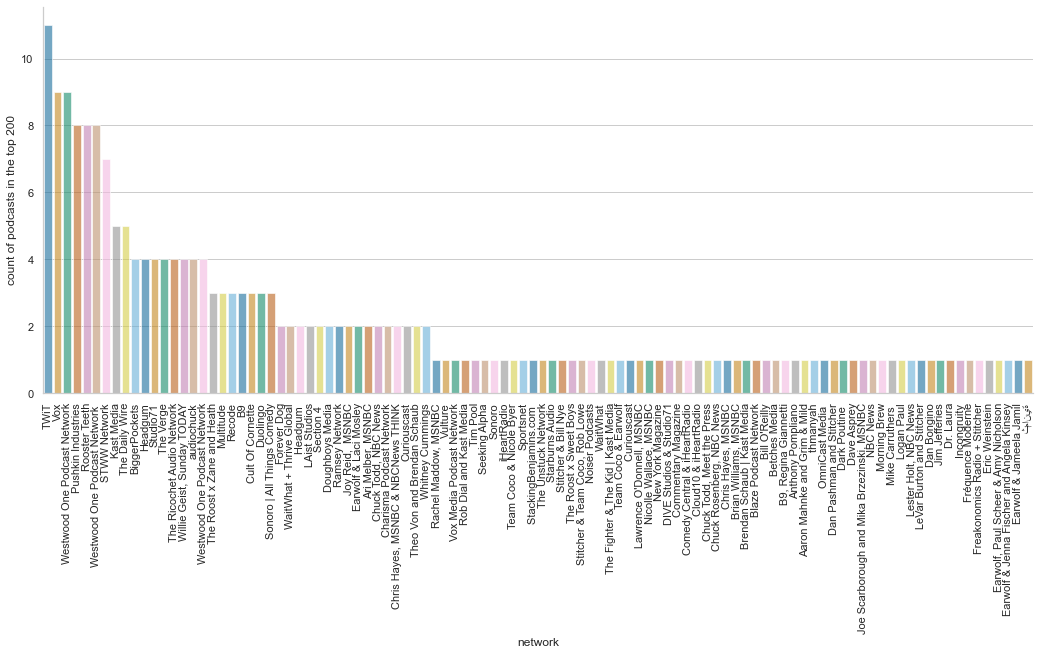

In [174]:
sns.set_theme(style="whitegrid")


sns.catplot(
    data=podcastAna_network3, kind="bar",
    x="network", y="name", palette="colorblind", alpha=.6, height=6, aspect=22/8.27).set_xticklabels(rotation=90).set_axis_labels("network", "count of podcasts in the top 200")


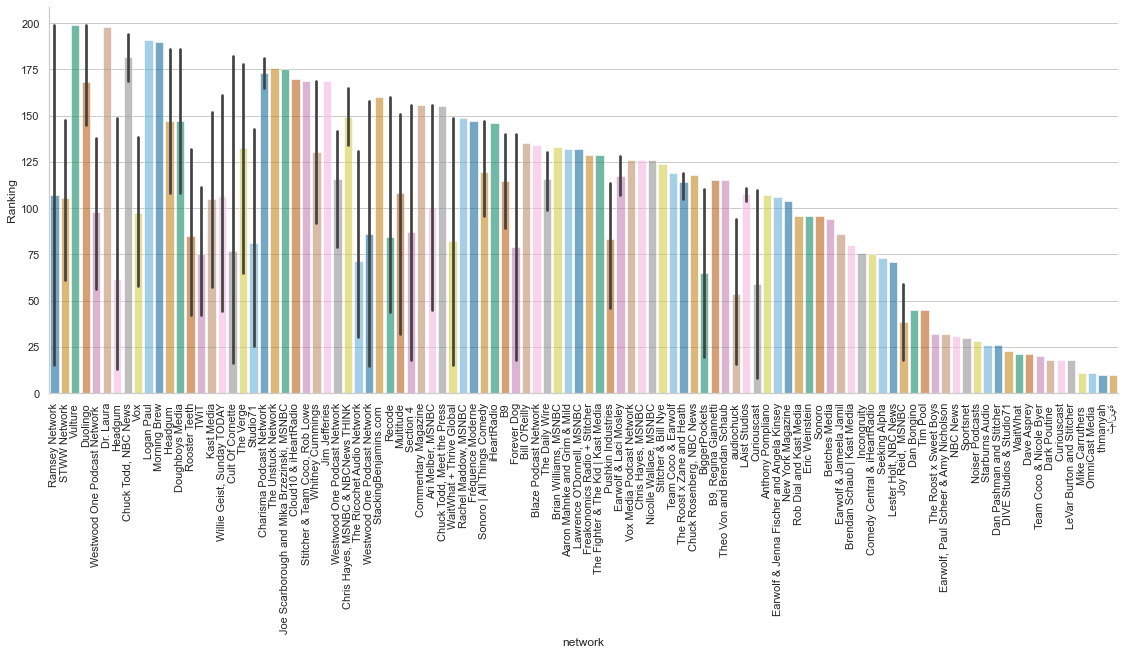

In [233]:
sns.set_theme(style="whitegrid")


sns.catplot(
    data=podcastAna_all_network2.sort_values(by= 'rank', ascending= False), kind="bar",
    x="network", y="rank", palette="colorblind", alpha=.6, height=6, aspect=22/8.27).set_xticklabels(rotation=90).set_axis_labels("network", "Ranking")


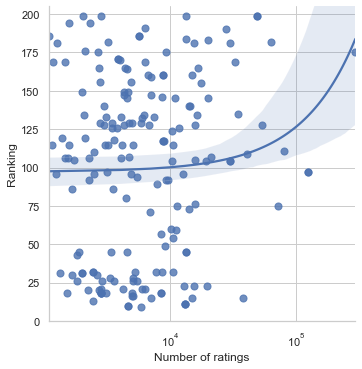

In [221]:

sns.lmplot(x ='num_ratings', y = 'rank', data= podcastAna_all_network2,
        robust = True, scatter_kws={"s": 50}).set(ylim=(0, 205)).set_axis_labels("Number of ratings", "Ranking").set(xscale="log")

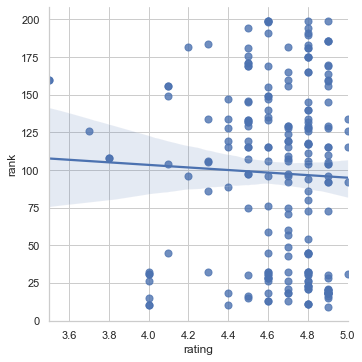

In [234]:
sns.lmplot(x ='rating', y = 'rank', data = podcastAna_all_network2, scatter_kws={"s": 50})

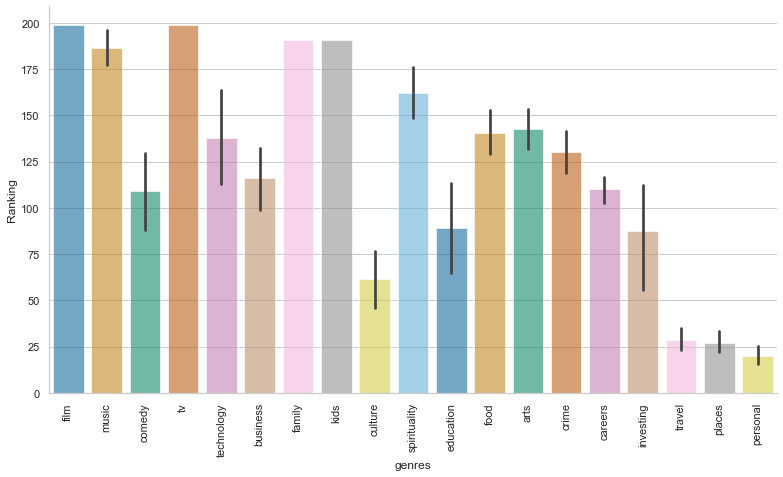

In [238]:
sns.set_theme(style="whitegrid")


sns.catplot(
    data=podcastAna_all_network2.sort_values(by= 'rank', ascending= False), kind="bar",
    x="genres", y="rank", palette="colorblind", alpha=.6, height=6, aspect=15/8.27).set_xticklabels(rotation=90).set_axis_labels("genres", "Ranking")
